CRADLE peak calls to compare:

Cell Line 1 - COV434 : `/data/reddylab/Laavanya/pcosStarrSeq/experiments/20220715-BACSS-COV434/processing/CRADLEop/PeakCalls/V2norm-mi1000-fdr01/CRADLE_peaks`

Cell Line 2 - H295R : `/data/reddylab/Laavanya/pcosStarrSeq/experiments/20220310-NextSeqH295RBAVSS/processing/CRADLEop/PeakCalls/V4-normmi-500-fdr01/CRADLE_peaks`

In [1]:
!wc -l /data/reddylab/Laavanya/pcosStarrSeq/experiments/20220715-BACSS-COV434/processing/CRADLEop/PeakCalls/V2norm-mi1000-fdr01/CRADLE_peaks
!wc -l /data/reddylab/Laavanya/pcosStarrSeq/experiments/20220310-NextSeqH295RBAVSS/processing/CRADLEop/PeakCalls/V4-normmi-500-fdr01/CRADLE_peaks

1270 /data/reddylab/Laavanya/pcosStarrSeq/experiments/20220715-BACSS-COV434/processing/CRADLEop/PeakCalls/V2norm-mi1000-fdr01/CRADLE_peaks
1142 /data/reddylab/Laavanya/pcosStarrSeq/experiments/20220310-NextSeqH295RBAVSS/processing/CRADLEop/PeakCalls/V4-normmi-500-fdr01/CRADLE_peaks


In [31]:
%%bash
tail -n+2 /data/reddylab/Laavanya/pcosStarrSeq/experiments/20220310-NextSeqH295RBAVSS/processing/CRADLEop/PeakCalls/V4-normmi-500-fdr01/CRADLE_peaks \
| cut -f1,2,3,7 \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_cradlePeaks_effectSize.bed

In [1]:
%%bash
cat /data/reddylab/Laavanya/pcosStarrSeq/experiments/20220715-BACSS-COV434/processing/CRADLEop/PeakCalls/V2norm-mi1000-fdr01/CRADLE_peaks \
| cut -f1,2,3,7 \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed

/data/reddylab/software/miniconda3/envs/revathy_py3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


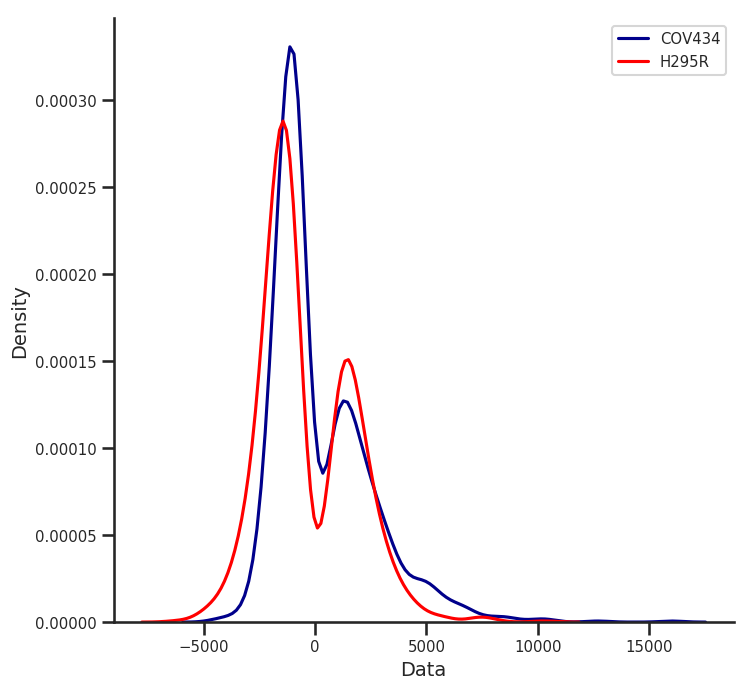

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


col_names=['chr','start','end','score','strand','effectSize','inputCount','outputCount','-log(pValue)','-log(qValue)','cohens_d','pseudolog2FC']
cell_1 = pd.read_csv('/data/reddylab/Laavanya/pcosStarrSeq/experiments/20220715-BACSS-COV434/processing/CRADLEop/PeakCalls/V2norm-mi1000-fdr01/CRADLE_peaks', sep='\t', names=col_names)
cell_2 = pd.read_csv('/data/reddylab/Laavanya/pcosStarrSeq/experiments/20220310-NextSeqH295RBAVSS/processing/CRADLEop/PeakCalls/V4-normmi-500-fdr01/CRADLE_peaks', sep='\t')

plt.figure(figsize=(8,8))
sns.distplot(cell_1['effectSize'], bins=100, hist=False, kde=True, color='darkblue', label='COV434')
sns.distplot(cell_2['effectSize'], bins=100, hist=False, kde=True, color='red', label="H295R")
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.savefig('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434.H295R.effectSize_densityPlots.png')
plt.show()




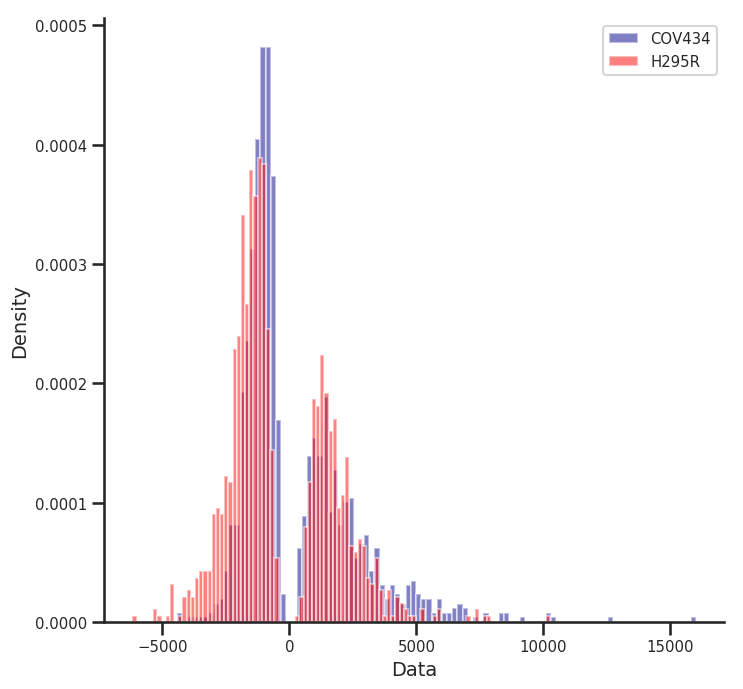

In [27]:
plt.figure(figsize=(8,8))
plt.hist(cell_1['effectSize'], density=True, bins=100, alpha=0.5, label="COV434", color='darkblue')
plt.hist(cell_2['effectSize'], density=True, bins=100, alpha=0.5, label="H295R", color='red')
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.savefig('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434.H295R.effectSize_densityPlots_histograms.png')
plt.show()

In [23]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate revathy_py3
bedtools intersect \
-a /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed \
-b /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_cradlePeaks_effectSize.bed \
-wo \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed

In [24]:
!wc -l /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed

386 /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed


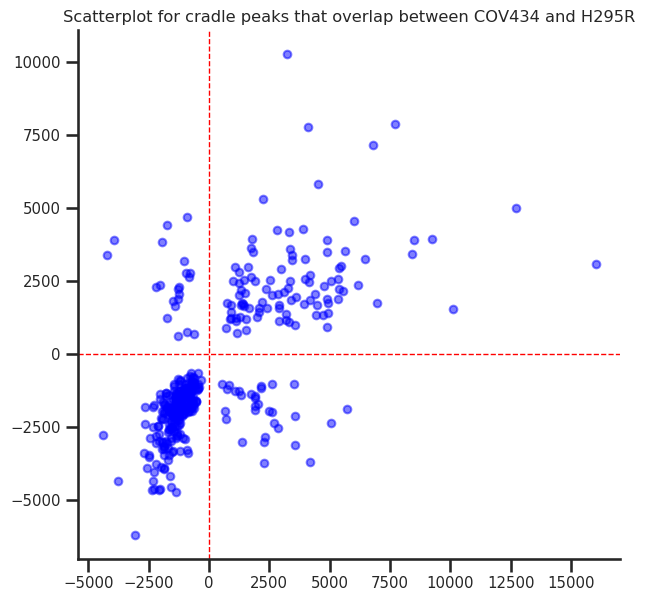

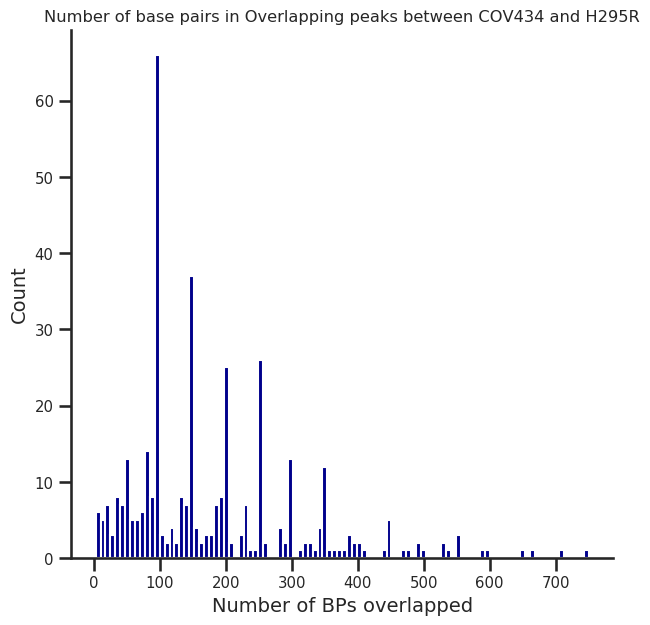

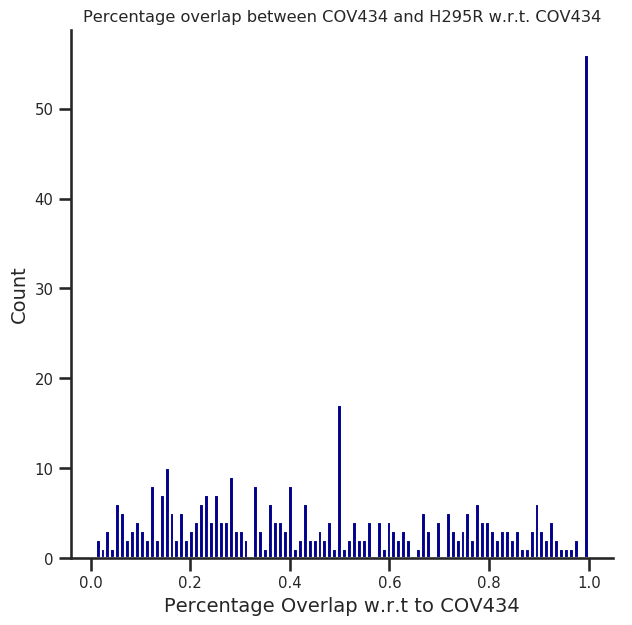

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
sns.set_context("talk", font_scale=0.65)
plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':100})

cradlePeaks = pd.read_csv('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed', sep='\t',
                          names=['COV434_chr','COV434_start','COV434_end','COV434_effectSize','H295R_chr','H295R_start','H295R_end','H295R_effectSize','count'])
cradlePeaks['overlap%_A'] = cradlePeaks['count']/(cradlePeaks['COV434_end']-cradlePeaks['COV434_start'])
cradlePeaks['overlap%_B'] = cradlePeaks['count']/(cradlePeaks['H295R_end']-cradlePeaks['H295R_start'])
cradlePeaks[['COV434_chr','COV434_start','COV434_end','COV434_effectSize','H295R_chr','H295R_start','H295R_end','H295R_effectSize']].to_csv('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_all_overlapping_peaks.txt', sep='t', index=False)


plt.scatter(cradlePeaks['COV434_effectSize'].values, cradlePeaks['H295R_effectSize'].values, marker='o', s=30, color='blue', alpha=0.5)
plt.axhline(0, color='red', linewidth = 1, linestyle = 'dashed')
plt.axvline(0, color='red', linewidth = 1, linestyle = 'dashed')
plt.title('Scatterplot for cradle peaks that overlap between COV434 and H295R')
sns.despine()
plt.savefig('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_scatterPlot.png')
plt.show()

plt.hist(cradlePeaks['count'], bins=100, alpha=1, color='darkblue')
plt.xlabel("Number of BPs overlapped", size=14)
plt.ylabel("Count", size=14)
plt.title('Number of base pairs in Overlapping peaks between COV434 and H295R')
sns.despine()
plt.savefig('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_overlapping_peaks_vs_count_of_BPs_overlapped.png')
plt.show()

plt.hist(cradlePeaks['overlap%_A'], bins=100, alpha=1, color='darkblue')
plt.xlabel("Percentage Overlap w.r.t to COV434", size=14)
plt.ylabel("Count", size=14)
plt.title('Percentage overlap between COV434 and H295R w.r.t. COV434')
sns.despine()
plt.savefig('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_overlapping_peaks_vs_percent_overlapped.png')
plt.show()



In [4]:
cradlePeaks

,COV434_chr,COV434_start,COV434_end,COV434_effectSize,H295R_chr,H295R_start,H295R_end,H295R_effectSize,count,overlap%_A,overlap%_B
0,chr11,30034157,30034607,2398,chr11,30034248,30034664,1575,359,0.797778,0.862981
1,chr11,30041872,30042172,5337,chr11,30041972,30042372,1868,200,0.666667,0.500000
2,chr11,30057520,30057770,3305,chr11,30057572,30057672,1108,100,0.400000,1.000000
3,chr11,30089572,30089972,6967,chr11,30089622,30090172,1760,350,0.875000,0.636364
4,chr11,30103672,30104272,-888,chr11,30104072,30104272,-1969,200,0.333333,1.000000
5,chr11,30107872,30108222,8404,chr11,30107922,30108172,3407,250,0.714286,1.000000
6,chr11,30118518,30118804,4471,chr11,30118672,30118772,1662,100,0.349650,1.000000
7,chr11,30145634,30145784,-1770,chr11,30145522,30145772,-1326,138,0.920000,0.552000
8,chr11,30174472,30174822,5463,chr11,30174422,30174822,2996,350,1.000000,0.875000
9,chr11,30197872,30198772,5369,chr11,30197672,30197922,2946,50,0.055556,0.200000


The last plot shows that the number of peaks overlapped is high for 100% overlap followed by 50% overlapped, so redoing the bedtools intersect with these percentages w.r.t COV434

In [14]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate revathy_py3
bedtools intersect -wo \
-a /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed \
-b /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_cradlePeaks_effectSize.bed \
-f 1.0 \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_full_overlap.bed

In [15]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate revathy_py3
bedtools intersect -wo \
-a /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed \
-b /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_cradlePeaks_effectSize.bed \
-f 0.5 \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_50%_overlap.bed

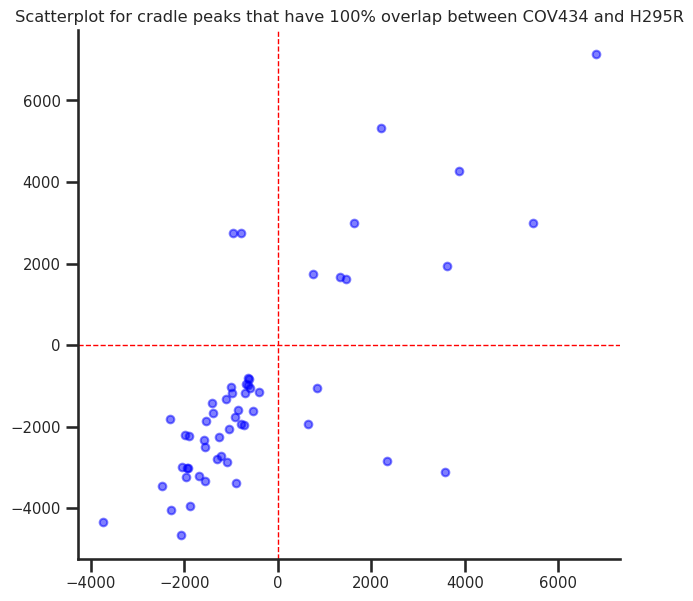

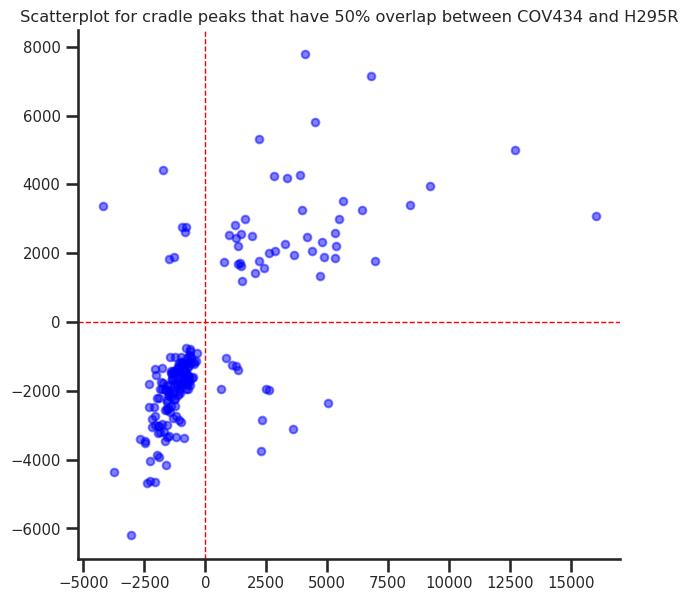

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 4})
sns.set_context("talk", font_scale=0.65)
plt.rcParams.update({'figure.figsize':(7,7), 'figure.dpi':100})

full_overlap = pd.read_csv('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_full_overlap.bed', sep='\t',
                          names=['COV434_chr','COV434_start','COV434_end','COV434_effectSize','H295R_chr','H295R_start','H295R_end','H295R_effectSize','count'])

half_overlap = pd.read_csv('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_50%_overlap.bed', sep='\t',
                          names=['COV434_chr','COV434_start','COV434_end','COV434_effectSize','H295R_chr','H295R_start','H295R_end','H295R_effectSize','count'])

plt.scatter(full_overlap['COV434_effectSize'].values, full_overlap['H295R_effectSize'].values, marker='o', s=30, color='blue', alpha=0.5)
plt.axhline(0, color='red', linewidth = 1, linestyle = 'dashed')
plt.axvline(0, color='red', linewidth = 1, linestyle = 'dashed')
plt.title('Scatterplot for cradle peaks that have 100% overlap between COV434 and H295R')
sns.despine()
plt.savefig('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_100%overlap_scatterPlot.png')
plt.show()

plt.scatter(half_overlap['COV434_effectSize'].values, half_overlap['H295R_effectSize'].values, marker='o', s=30, color='blue', alpha=0.5)
plt.axhline(0, color='red', linewidth = 1, linestyle = 'dashed')
plt.axvline(0, color='red', linewidth = 1, linestyle = 'dashed')
plt.title('Scatterplot for cradle peaks that have 50% overlap between COV434 and H295R')
sns.despine()
plt.savefig('/data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_50%overlap_scatterPlot.png')
plt.show()

In [25]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate revathy_py3
bedtools subtract \
-a /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed \
-b /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_cradlePeaks_effectSize.bed \
| wc -l

1319


In [23]:
!wc -l /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed
!wc -l /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed

1270 /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed
386 /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed


In [24]:
1270-386

884

In [28]:
!head /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed

chr11	30034157	30034607	2398
chr11	30041872	30042172	5337
chr11	30049924	30050218	3724
chr11	30057520	30057770	3305
chr11	30074456	30074756	2079
chr11	30089572	30089972	6967
chr11	30092507	30092740	-1639
chr11	30092922	30093107	-1287
chr11	30099172	30099522	4759
chr11	30103672	30104272	-888


In [27]:
!head /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed

chr11	30034157	30034607	2398	chr11	30034248	30034664	1575	359
chr11	30041872	30042172	5337	chr11	30041972	30042372	1868	200
chr11	30057520	30057770	3305	chr11	30057572	30057672	1108	100
chr11	30089572	30089972	6967	chr11	30089622	30090172	1760	350
chr11	30103672	30104272	-888	chr11	30104072	30104272	-1969	200
chr11	30107872	30108222	8404	chr11	30107922	30108172	3407	250
chr11	30118518	30118804	4471	chr11	30118672	30118772	1662	100
chr11	30145634	30145784	-1770	chr11	30145522	30145772	-1326	138
chr11	30174472	30174822	5463	chr11	30174422	30174822	2996	350
chr11	30197872	30198772	5369	chr11	30197672	30197922	2946	50


In [45]:
%%bash
cat /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed \
| cut -f1,2,3 \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/all_COV434_intersected_peaks.bed

In [46]:
%%bash
bedtools subtract \
-a /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_cradlePeaks_effectSize.bed \
-b /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/all_COV434_intersected_peaks.bed \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_non_overlapping_cradlePeaks.bed

In [47]:
%%bash
cat /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/COV434_H295R_cradlePeaks_intersected.bed \
| cut -f5,6,7 \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/all_H295R_intersected_peaks.bed

In [48]:
%%bash
bedtools subtract \
-a /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_cradlePeaks_effectSize.bed \
-b /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/all_H295R_intersected_peaks.bed \
> /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_non_overlapping_cradlePeaks.bed

In [50]:
!wc -l /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_cradlePeaks_effectSize.bed
!wc -l /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/all_H295R_intersected_peaks.bed
!wc -l /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_non_overlapping_cradlePeaks.bed

1141 /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_cradlePeaks_effectSize.bed
386 /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/all_H295R_intersected_peaks.bed
768 /data/reddylab/Revathy/collabs/Laavanya/results/peak_comparison/H295R_non_overlapping_cradlePeaks.bed
